# Seaborn
- Extensively used in EDA

## Distribution Plots
- distplot
- jointplot - For Bivariate Analysis
- pairplot - For more than 2 features, Multivariate Analysis

Practice problem on IRIS Dataset

Remember, in SUPERVISED ML, whenever you get a dataset; there are features in ML like F1,F2,F3,F4; and based on the classification and regression problem, we'll be dividing our dataset into dependent and independent features.
- Example -> If a value is computed through other values, it becomes dependent on those features.

1. Whenever we are comparing only 1 feature, it's called a univariate analysis.
2. Whenever we are comparing 2 features, it's called a bivariate analysis. We find the relation between features F1 and F2, and plot a 2-D diagram and see how the data is behaving.
3. When we have more than 2 features, it can be very hard for us to see/understand the relation between features. So SEABORN provides us with various plots.

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We should be able to find the tip (dependent) based on other features (independent).

## Correlation with Heatmap

- A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2-D correlation matrix (table) b/w 2 discrete dimensions or event types.
- It is very important in Feature Selection.

- We can only find correlation b/w numerical features, NOT categorical ones. This is because categories are objects.
- Correlation value ranges b/w -1 to +1, and is called Pearson Coefficient Correlation.

In [3]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


- In the 1st row, the correlation of total_bill with tip is +67%, which means that as the total_bill increases, tip will also increase.
- So this tells us the numerical value of correlation; but it'd be better if we could visualise this. We use a heatmap to do this.

In [4]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

<AxesSubplot:>

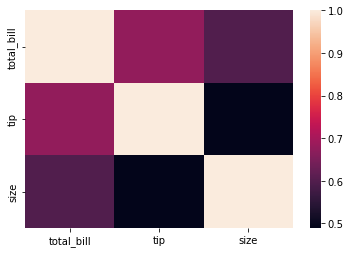

In [5]:
sns.heatmap(df.corr())
# we need to provide a matrix of correlation to the heatmap, for it to plot it. 

- Heatmap is useful in EDA because if the correlation of 2 independent features is almost the same or is highly towards 1, then we can use any 1 of those features to build our model.

## JointPlot
- A joint plot allows to study the relationship between 2 numeric variables.
- The central chart displays their correlation.
- It is usually a scatter plot, a hexabin plot, a 2-D histoogram or a 2-D density plot.

### Univariate Analysis (Bivariate, technically)

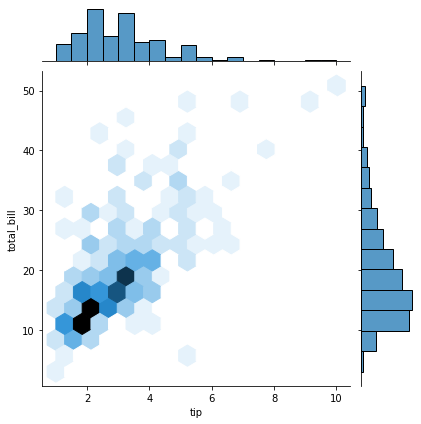

In [6]:
sns.jointplot(x='tip',y='total_bill',data=df,kind='hex')

- This jointplot depicts that the majority of bill is in the range 10-20 and tip in the range 2-4.
- There are very less outliers where bill is greater than 50 and tip is around 10.

Jointplot has more properties than a normal plot like :
- The 'x-axis' histogram is shown on top
- The 'y-axis' histogram is shown on right
- It also tells us the area with higher concentration of points


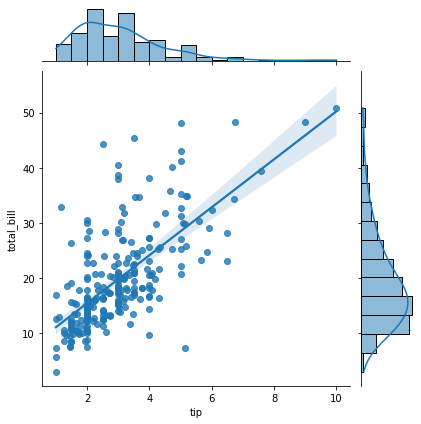

In [7]:
sns.jointplot(x='tip',y='total_bill',data=df,kind='reg')
# If kind = 'reg'(regression), jointplot will draw a Probability Density Function (PDF), and will also draw a regression line/ best fit line.

## Pair Plot

- A pair plot is also known as a 'scatter plot', in which one variable in the same data row is matched with another variable's value.
- Pair plots are just elaborations on this , showing all variables paired with all the other variables.

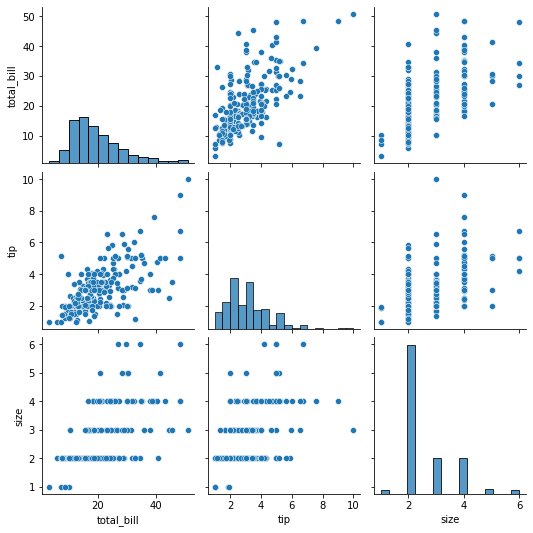

In [8]:
sns.pairplot(df)

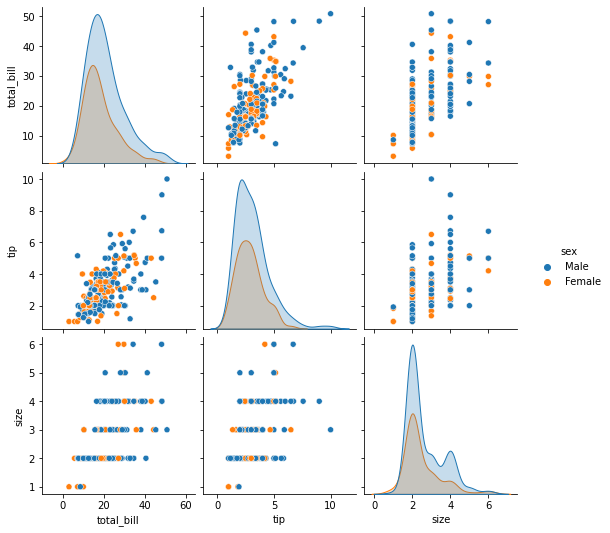

In [9]:
sns.pairplot(df,hue='sex')
# This will color the scatterplot based on different categories in the 'sex' feature.

## DistPlot

- It helps us to check the distribution of the columns feature, in form of a histogram. 

/Users/mahakkaurchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

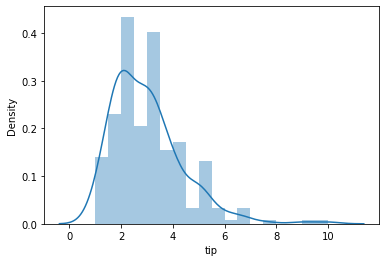

In [10]:
sns.distplot(df['tip'])
# If kde='True', which is default value, it shows on the basis of density / % on the y-axis.
# If kde='False', it'll show the count on the y-axis.

/Users/mahakkaurchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip'>

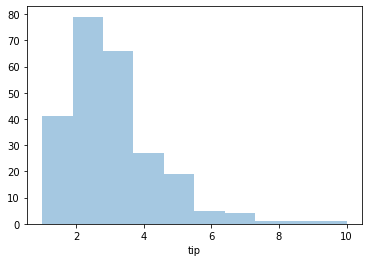

In [11]:
sns.distplot(df['tip'],kde=False,bins=10)
# kde = kernel density execution

## Categorical Plots

Seaborn also helps us in doing the analysis on Categorical Data points.

In this section, we'll see :
- boxplot
- violinplot
- countplot
- bar plot

#### Countplot -> Show the counts of observations in each categorical bin using bars.

In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/Users/mahakkaurchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

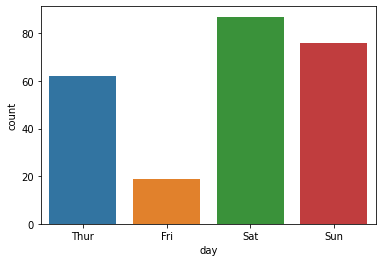

In [13]:
sns.countplot('day',data=df)

<AxesSubplot:xlabel='count', ylabel='sex'>

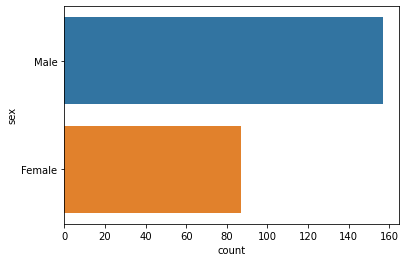

In [14]:
sns.countplot(y='sex',data=df)

#### Barplot -> Show point estimates and confidence intervals as rectangular bars.

- Univariate analysis
- Does the same thing as 'countplot' but we must give both x and y values.
- Helps us to find relation b/w categorical feature and numerical feature.

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

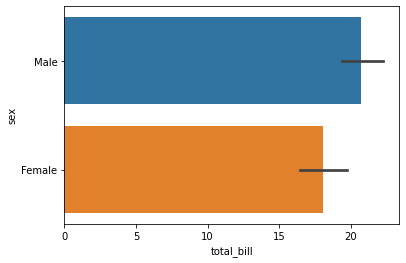

In [17]:
sns.barplot(x='total_bill',y='sex',data=df)

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

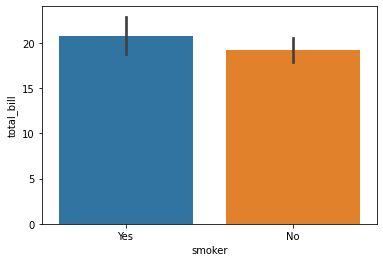

In [16]:
sns.barplot(y='total_bill',x='smoker',data=df)

#### Box Plot
A box and whisker plot (aka boxplot) is a graph that presents info from a 5-number summary, i.e., 0th %ile, 25th %ile, 50th %ile, 75th %ile, and 100th %ile.

#### Watch statistics playlist to know about %iles.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

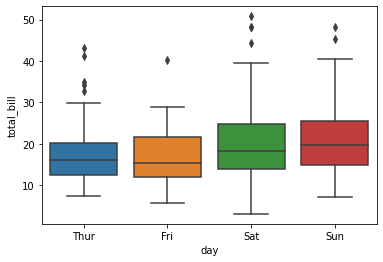

In [20]:
sns.boxplot(x='day',y='total_bill',data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

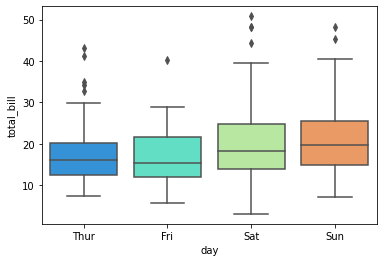

In [21]:
sns.boxplot(x='day',y='total_bill',data=df,palette='rainbow')

<AxesSubplot:>

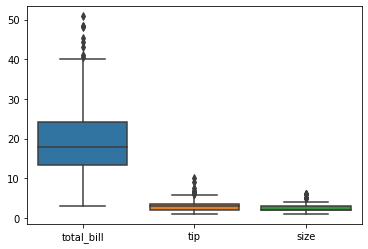

In [22]:
sns.boxplot(data=df,orient='v')
# If orient = 'v', it considers all the features and plots them. 

<AxesSubplot:xlabel='total_bill', ylabel='day'>

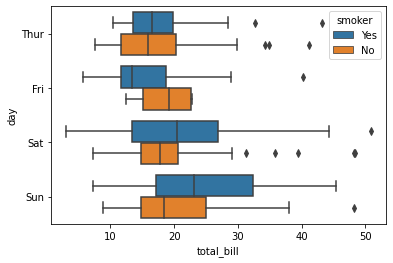

In [23]:
# categorise data based on some other categories -> with respect to smoker

sns.boxplot(x='total_bill',y='day',hue='smoker',data=df)

#### Violin Plot
It helps us to see both the distribution of data in terms of kernel density estimation and the box plot.

<AxesSubplot:xlabel='total_bill', ylabel='day'>

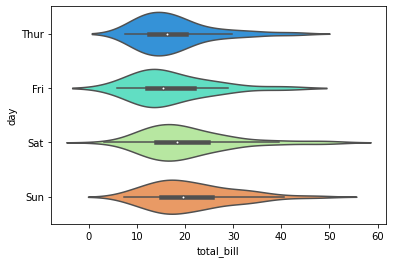

In [24]:
sns.violinplot(x='total_bill',y='day',data=df,palette='rainbow')

## Practice Homework
On iris datset -> iris = sns.load_dataset('iris')

In [25]:
iris = sns.load_dataset('iris')

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [30]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

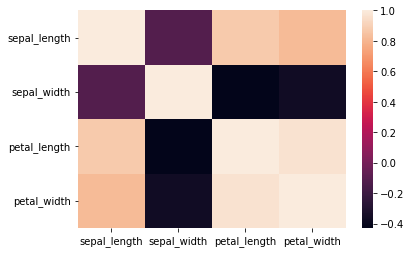

In [32]:
sns.heatmap(iris.corr())

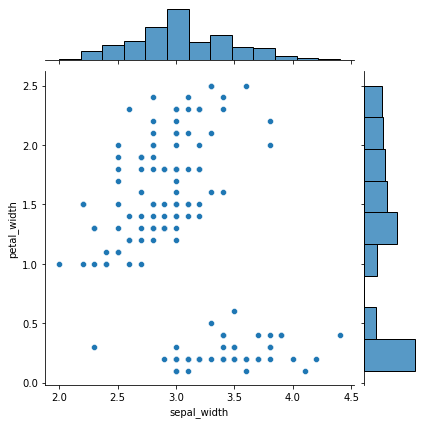

In [33]:
sns.jointplot(x='sepal_width',y='petal_width',data=iris)
# Highly non-related

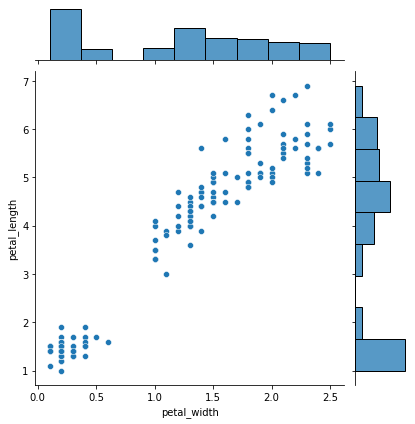

In [34]:
sns.jointplot(x='petal_width',y='petal_length',data=iris)

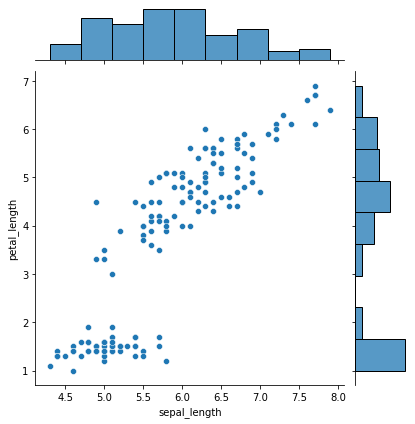

In [35]:
sns.jointplot(x='sepal_length',y='petal_length',data=iris)

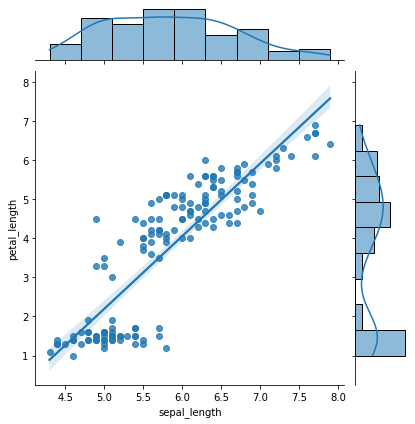

In [36]:
sns.jointplot(x='sepal_length',y='petal_length',data=iris,kind='reg')

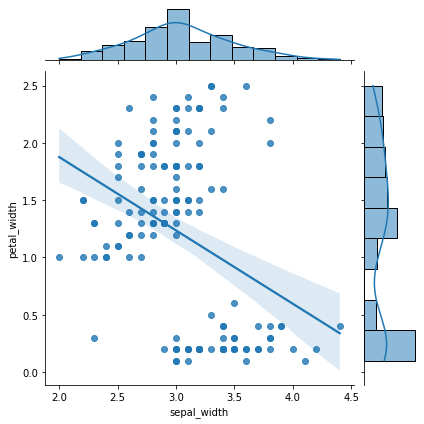

In [37]:
sns.jointplot(x='sepal_width',y='petal_width',data=iris,kind='reg')
# -ve correlation

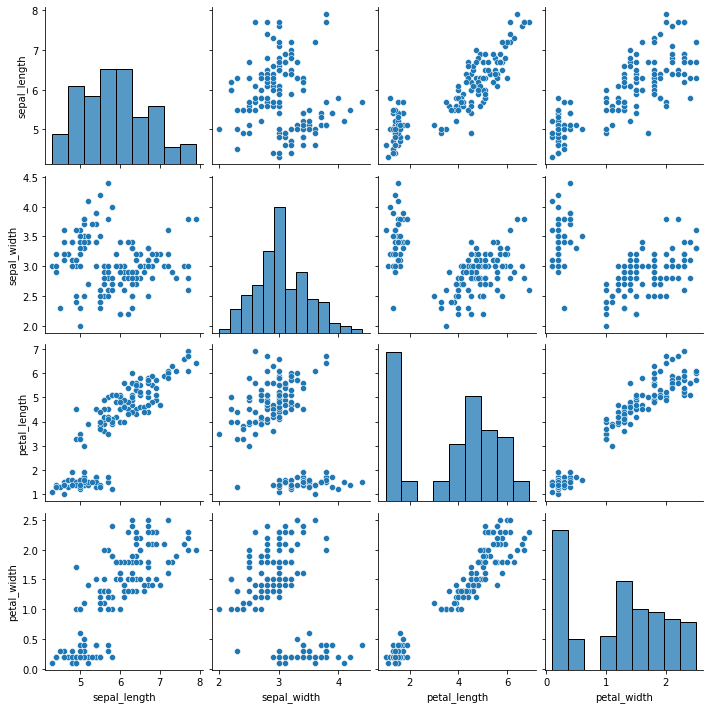

In [38]:
sns.pairplot(iris)

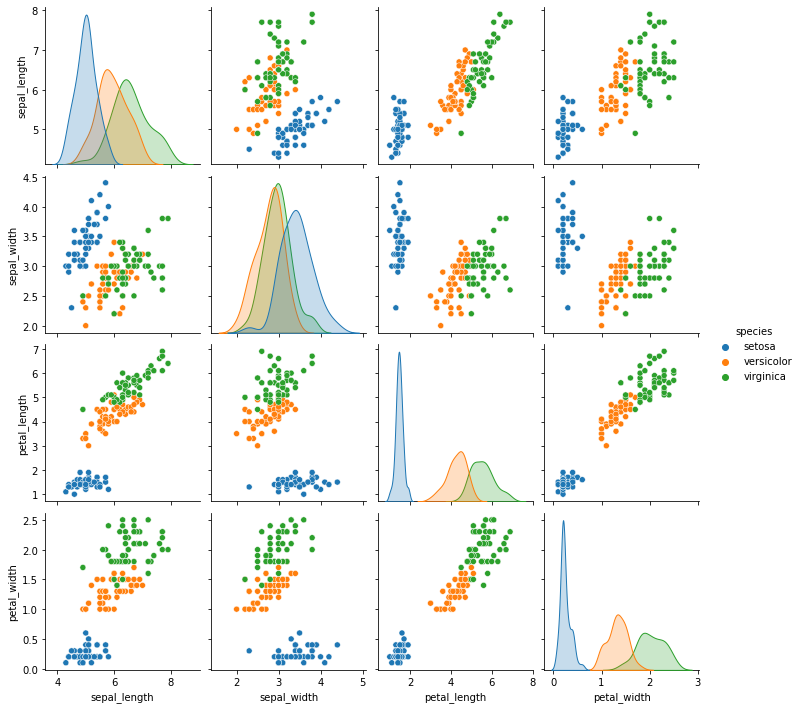

In [39]:
sns.pairplot(iris,hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

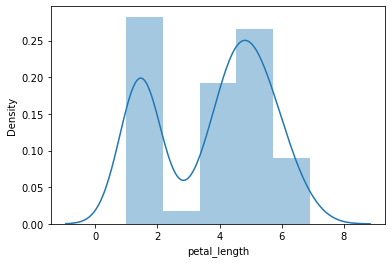

In [41]:
sns.distplot(iris['petal_length'])

/Users/mahakkaurchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

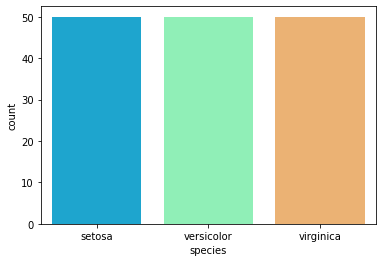

In [44]:
sns.countplot('species',data=iris,palette='rainbow')

/Users/mahakkaurchhabra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='count'>

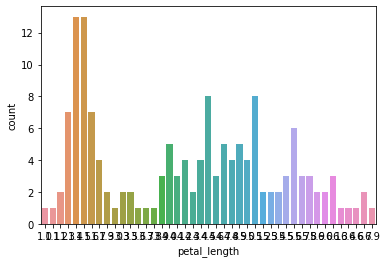

In [48]:
sns.countplot('petal_length',data=iris)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

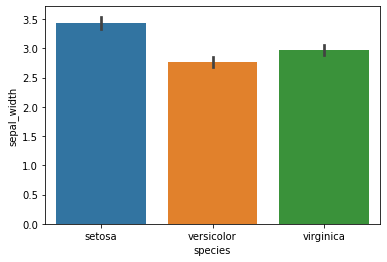

In [49]:
sns.barplot(y='sepal_width',x='species',data=iris)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

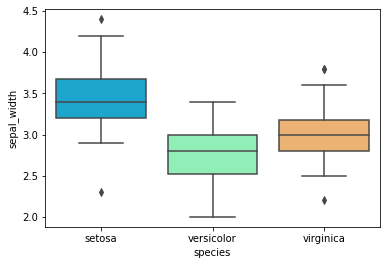

In [52]:
sns.boxplot(y='sepal_width',x='species',data=iris,palette='rainbow')

<AxesSubplot:>

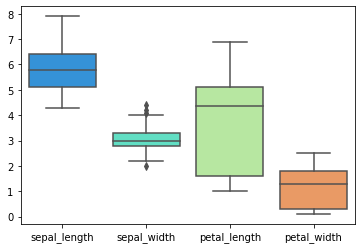

In [53]:
sns.boxplot(data=iris,orient='v',palette='rainbow')

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

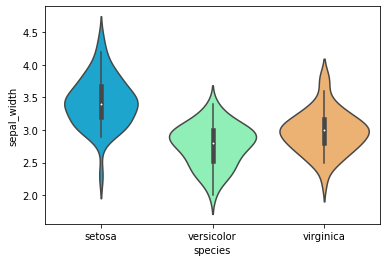

In [54]:
sns.violinplot(y='sepal_width',x='species',data=iris,palette='rainbow')

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

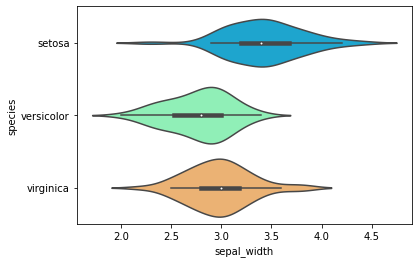

In [55]:
sns.violinplot(x='sepal_width',y='species',data=iris,palette='rainbow')